# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd
import matplotlib
% matplotlib inline
import numpy as np

## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
df = pd.read_csv("craftcans.csv", na_values=["Does not apply"])

In [3]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## How many rows do you have in the data? What are the column types?

In [4]:
df.shape

(2416, 7)

In [5]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [6]:
#df.groupby("Brewery").Style.value_counts()
round(df.Brewery.value_counts(normalize=True) * 100, 2).head(10)

Brewery Vivant                2.57
Oskar Blues Brewery           1.91
Sun King Brewing Company      1.58
Cigar City Brewing Company    1.04
Sixpoint Craft Ales           1.00
Hopworks Urban Brewery        0.95
Stevens Point Brewery         0.91
Great Crescent Brewery        0.83
21st Amendment Brewery        0.83
SanTan Brewing Company        0.79
Name: Brewery, dtype: float64

## What is the most common ABV? (alcohol by volume)

In [7]:
df.ABV.value_counts().head(1)

5.00%    215
Name: ABV, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [8]:
df.ABV.head()

0    4.50%
1    4.90%
2    4.80%
3    6.00%
4    6.00%
Name: ABV, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [9]:
df['ABV'] = df.ABV.str.replace("%", "")
df['ABV'].head()

0    4.50
1    4.90
2    4.80
3    6.00
4    6.00
Name: ABV, dtype: object

In [10]:
df.ABV.describe()

count     2348
unique      74
top       5.00
freq       215
Name: ABV, dtype: object

In [11]:
df.ABV.head(5)

0    4.50
1    4.90
2    4.80
3    6.00
4    6.00
Name: ABV, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [12]:
df['ABV'] = df.ABV.astype(float)
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs        float64
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [13]:
df.ABV.describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

In [14]:
df.ABV.mean()

5.977342419080068

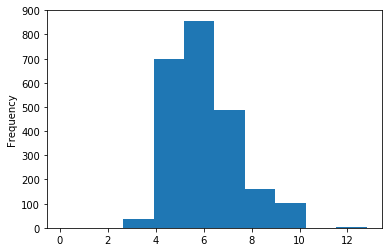

In [15]:
df.ABV.plot(kind="hist")

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [16]:
df.ABV.isnull().value_counts()

False    2348
True       68
Name: ABV, dtype: int64

In [17]:
# drops everything, changes the dataframe, shape will be different
# df.dropna(subset=["ABV"], inplace=True)

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [18]:
df.Location.value_counts()

Grand Rapids, MI           66
Chicago, IL                55
Portland, OR               52
Indianapolis, IN           43
San Diego, CA              42
Boulder, CO                41
Denver, CO                 40
Brooklyn, NY               38
Seattle, WA                35
Longmont, CO               33
San Francisco, CA          32
Tampa, FL                  31
Stevens Point, WI          30
Austin, TX                 25
Fort Collins, CO           22
Cincinnati, OH             21
Boston, MA                 21
Aurora, IN                 20
Chandler, AZ               19
Saint Louis, MO            19
Eagle, CO                  19
Manhattan, KS              18
Missoula, MT               18
Boonville, CA              18
Davenport, IA              18
Boise, ID                  17
Salt Lake City, UT         17
San Antonio, TX            16
Astoria, OR                16
Durango, CO                16
                           ..
Kansas City, MO             1
Waynesville, NC             1
Plainfield

## List all of the beer from Brooklyn, NY

In [19]:
df[df.Location == "Brooklyn, NY"]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most cans of beer?

In [20]:
Brooklyn_Beer = df[df.Location == "Brooklyn, NY"]
Brooklyn_Beer.Brewery.value_counts()

Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [21]:
Sixpoint = Brooklyn_Beer[Brooklyn_Beer.Brewery == "Sixpoint Craft Ales"]
Sixpoint.Style.value_counts().head(5)

American IPA       4
Cream Ale          2
Rye Beer           2
Baltic Porter      2
German Pilsener    2
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [22]:
df[df["Location"].str.contains("NY", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
598,8 Barrel,Chatham Brewing,"Chatham, NY",American Strong Ale,16 oz.,8.0,69.0
599,Oktoberfest,Chatham Brewing,"Chatham, NY",Märzen / Oktoberfest,16 oz.,5.5,40.0
628,Cream Ale,Newburgh Brewing Company,"Newburgh, NY",Cream Ale,12 oz.,4.2,35.0


### Now *count* all of the breweries in New York state

In [23]:
df["Location"].str.contains("NY", na=False).value_counts()

False    2342
True       74
Name: Location, dtype: int64

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [24]:
df[df["Style"].str.contains(".*IPA", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
33,Villager,Fort Point Beer Company,"San Francisco, CA",American IPA,12 oz.,6.3,42.0
38,HopArt,COAST Brewing Company,"Charleston, SC",American IPA,16 oz.,7.7,NaN
39,Boy King,COAST Brewing Company,"Charleston, SC",American Double / Imperial IPA,16 oz.,9.7,NaN


In [25]:
df[df["Style"].str.contains(".*IPA", na=False) | df["Style"].str.contains("American IPA", na=False) | df["Style"].str.contains("Imperial IPA", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
33,Villager,Fort Point Beer Company,"San Francisco, CA",American IPA,12 oz.,6.3,42.0
38,HopArt,COAST Brewing Company,"Charleston, SC",American IPA,16 oz.,7.7,NaN
39,Boy King,COAST Brewing Company,"Charleston, SC",American Double / Imperial IPA,16 oz.,9.7,NaN


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [26]:
df.IBUs

0        50.0
1        26.0
2        19.0
3        38.0
4        25.0
5        47.0
6        68.0
7        80.0
8        25.0
9        42.0
10       25.0
11       21.0
12       13.0
13       17.0
14       68.0
15       38.0
16        NaN
17       65.0
18       20.0
19       18.0
20       15.0
21       80.0
22       65.0
23       45.0
24      100.0
25       85.0
26       24.0
27      100.0
28       30.0
29       28.0
        ...  
2386     30.0
2387     65.0
2388      NaN
2389      NaN
2390     42.0
2391     35.0
2392     40.0
2393      NaN
2394    113.0
2395     21.0
2396     11.0
2397     44.0
2398     40.0
2399     37.0
2400     34.0
2401     45.0
2402     45.0
2403    120.0
2404     20.0
2405     33.0
2406     99.0
2407     35.0
2408     65.0
2409     17.0
2410     98.0
2411     35.0
2412    100.0
2413     35.0
2414     85.0
2415     65.0
Name: IBUs, Length: 2416, dtype: float64

In [27]:
df.IBUs.replace("Does not apply", np.nan, inplace=True)

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [28]:
df.IBUs.mean()

42.71316725978647

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

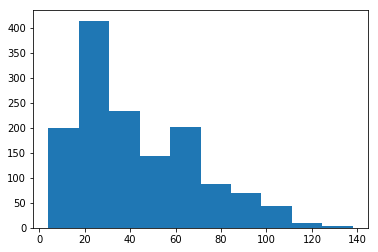

In [29]:
df.IBUs.hist(grid=False)

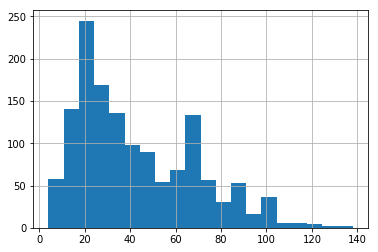

In [30]:
df.IBUs.hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [31]:
df.describe()

,ABV,IBUs
count,2348.000000,1405.000000
mean,5.977342,42.713167
std,1.354173,25.954066
min,0.100000,4.000000
25%,5.000000,21.000000
50%,5.600000,35.000000
75%,6.700000,64.000000
max,12.800000,138.000000


In [32]:
df[df.IBUs > 64]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0
22,Hoponius Union,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,12 oz.,6.7,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
46,Yeti Imperial Stout,Great Divide Brewing Company,"Denver, CO",Russian Imperial Stout,12 oz.,9.5,75.0


In [33]:
df[df.IBUs > 64].Beer

6                          Citra Ass Down
7                          London Balling
14                            Rico Sauvin
17                           Pile of Face
21                             Excess IPL
22                         Hoponius Union
24                         Habitus (2014)
25                                  Solis
27                                Habitus
46                    Yeti Imperial Stout
59      98 Problems (Cuz A Hop Ain't One)
62                           Train Hopper
68                                   Csar
69                         Saucy Intruder
79                             The Gadget
89                             Gone A-Rye
93                          Heavy Lifting
110                               Jah Mon
123                        Flying Mouse 4
149                        Citra Ass Down
168                            Soul Doubt
170                          Bimini Twist
178                             Long Leaf
182                        Double 

## List all of the beers with IBUs below the 25th percentile

In [34]:
df[df.IBUs < 21].Beer


2                                   Wall's End
12                                    Sho'nuff
13                                 Bloody Show
18                              The Brown Note
19                                 House Lager
20                                Leisure Time
30                                        Park
31                                   Westfalia
32                                         KSA
54                                     Sparkle
56                                Hotbox Brown
57                                        Gold
66                                  Cafe Leche
67                      Damascene Apricot Sour
90                                 Sex Panther
102                             Vanilla Porter
105                                       Gose
106                            Vermont Pilsner
134                        Ginger Peach Saison
139                              Weissenheimer
144                      Passion Fruit Prussia
145          

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

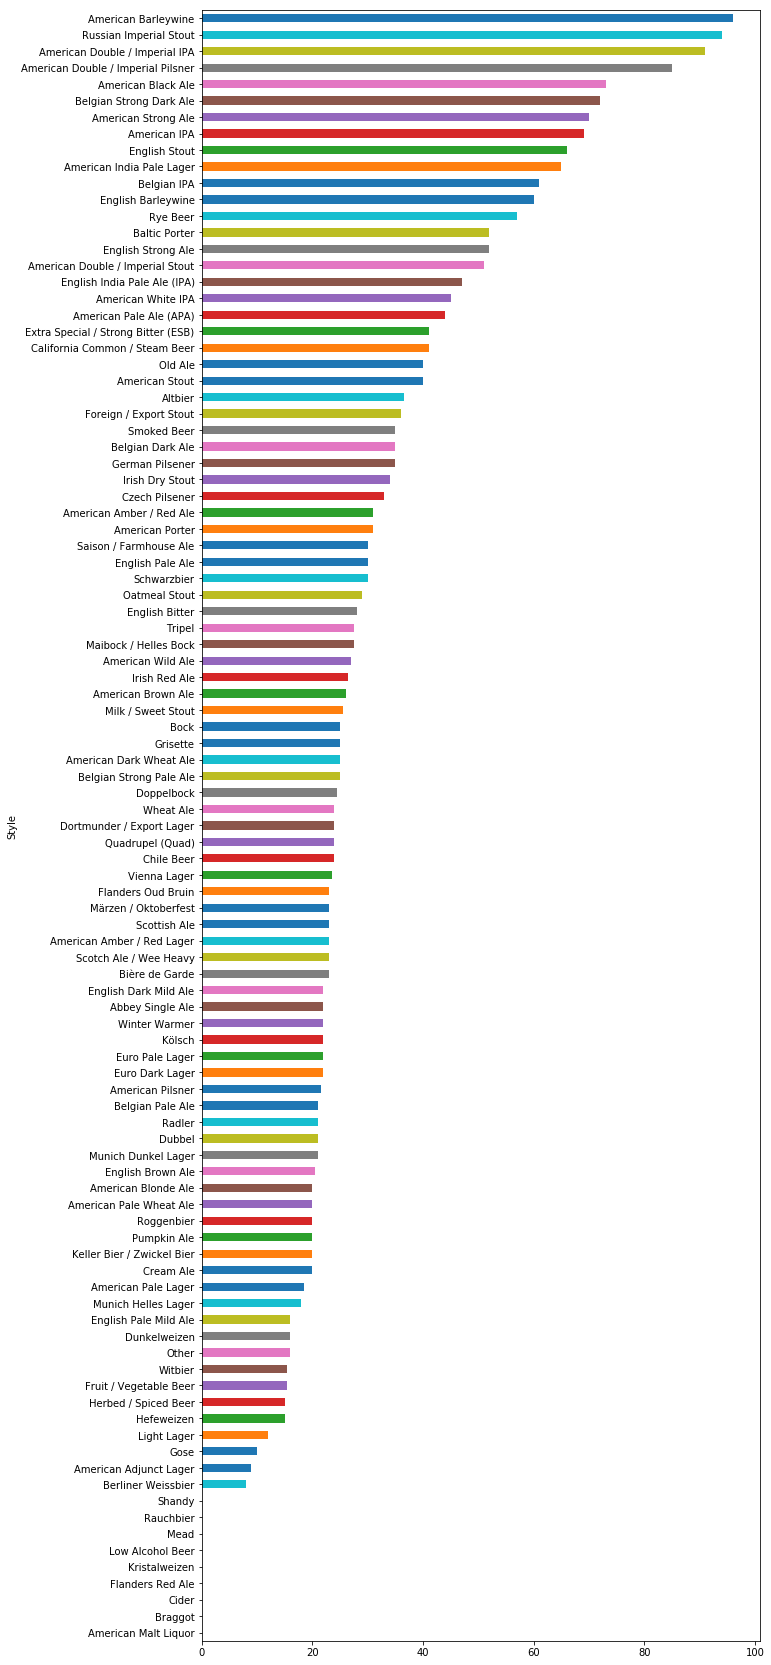

In [35]:
medianIBU = df.groupby("Style").IBUs.median().sort_values(na_position="first").plot(kind="barh", figsize=(10,30))
medianIBU

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [36]:
highIBUs = df[df.IBUs > 64]

In [37]:
highIBUs.Style.value_counts().head(5)

American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Style, dtype: int64

In [38]:
lowIBUs = df[df.IBUs < 21]

In [39]:
lowIBUs.Style.value_counts().head(5)

American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: Style, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [40]:
wheat_beers = df[df.Style.isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])]
wheat_beers.IBUs.mean()

18.982142857142858

In [41]:
wheat_beers

,Beer,Brewery,Location,Style,Size,ABV,IBUs
30,Park,Fort Point Beer Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.7,19.0
42,Whitewater,Great Divide Brewing Company,"Denver, CO",American Pale Wheat Ale,12 oz.,6.1,NaN
72,Citra Faced,Three Pints Brewing,"Martinsville, IN",American Pale Wheat Ale,16 oz.,5.5,64.0
112,Summer Wheat,Anchor Brewing Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.5,NaN
138,Waterkeeper,SweetWater Brewing Company,"Atlanta, GA",Hefeweizen,12 oz.,5.7,NaN
139,Weissenheimer,Destihl Brewery,"Bloomington, IL",Hefeweizen,12 oz.,5.2,16.0
142,Beach Cruiser,Latitude 42 Brewing Company,"Portage, MI",Hefeweizen,12 oz.,4.5,NaN
164,Pinata Protest,Freetail Brewing Company,"San Antonio, TX",Witbier,12 oz.,6.0,NaN
167,Rye Wit,Freetail Brewing Company,"San Antonio, TX",Witbier,12 oz.,4.2,10.0
190,Beach Patrol,Brewery Vivant,"Grand Rapids, MI",Witbier,16 oz.,6.5,NaN


## Draw a histogram of the IBUs of those beers

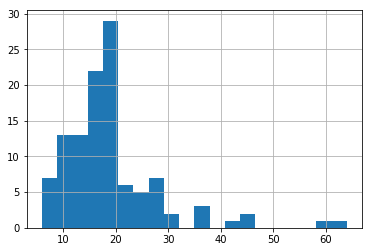

In [42]:
wheat_beers.IBUs.hist(bins=20)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

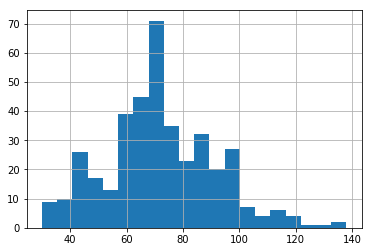

In [43]:
IPA_beers = df[df.Style.str.contains(".*IPA", na=False)]
IPA_beers.IBUs.hist(bins=20)

In [44]:
IPA_beers.IBUs.mean()

71.94897959183673

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

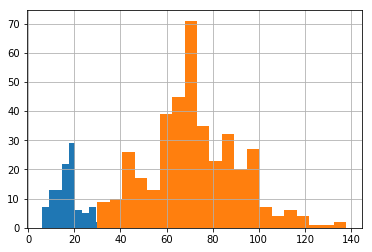

In [45]:
ax = wheat_beers.IBUs.hist(bins=20)
IPA_beers.IBUs.hist(ax=ax, bins=20)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [46]:
IPA_beers.ABV.mean()

6.879285714285714

In [47]:
wheat_beers.ABV.mean()

5.043715846994536

## Good work!

If you made it this far you deserve a drink.